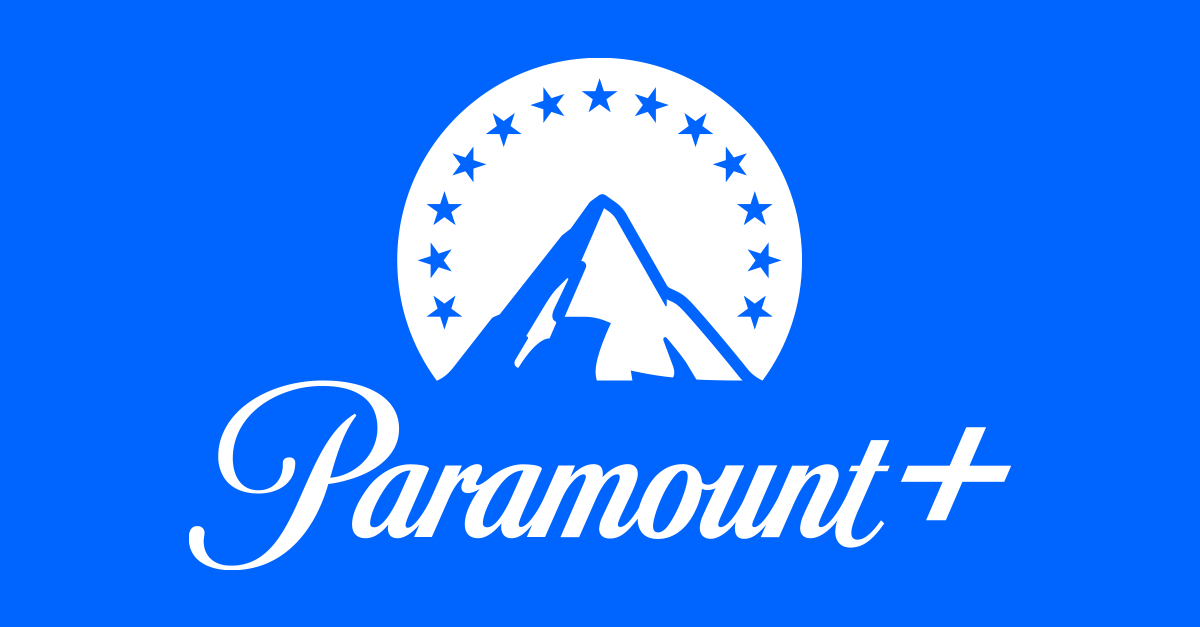

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
paramount_plus = pd.read_csv('paramount_titles.csv')

In [3]:
paramount = paramount_plus.copy()

In [4]:
def null_rate_fn(df):
    for i in df.columns:
        null_rate = df[i].isna().sum()/len(df) *100
        if null_rate > 0 :
            print('{} null rate is {}%'.format(i, round(null_rate,2)))

In [5]:
null_rate_fn(paramount)

description null rate is 0.35%
age_certification null rate is 51.54%
seasons null rate is 79.13%
imdb_id null rate is 4.65%
imdb_score null rate is 6.51%
imdb_votes null rate is 6.6%
tmdb_popularity null rate is 1.51%
tmdb_score null rate is 13.76%


In [7]:
paramount.head()

id             title   type  \
0   tm65789  Sunset Boulevard  MOVIE   
1   tm83884   His Girl Friday  MOVIE   
2    tm5012         Red River  MOVIE   
3   tm19248       The General  MOVIE   
4  tm122846           The Kid  MOVIE   

                                         description  release_year  \
0  A hack screenwriter writes a screenplay for a ...          1950   
1  Hildy, the journalist former wife of newspaper...          1940   
2  Headstrong Thomas Dunson starts a thriving Tex...          1948   
3  During America’s Civil War, Union spies steal ...          1926   
4  A tramp cares for a boy after he's abandoned a...          1921   

  age_certification  runtime  \
0                PG      110   
1               NaN       92   
2               NaN      133   
3               NaN       79   
4               NaN       68   

                                              genres production_countries  \
0                                          ['drama']               ['US']   
1                     ['drama', 'romance', 'comedy']               ['US']   
2          ['western', 'drama', 'romance', 'action']               ['US']   
3  ['comedy', 'drama', 'action', 'war', 'western'...               ['US']   
4                      ['comedy', 'drama', 'family']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      NaN  tt0043014         8.4    224704.0           18.431       8.366  
1      NaN  tt0032599         7.8     60244.0           14.759       7.433  
2      NaN  tt0040724         7.8     32210.0           12.400       7.400  
3      NaN  tt0017925         8.1     92935.0           12.316       8.009  
4      NaN  tt0012349         8.3    128096.0           14.865       8.212

In [8]:
paramount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3182 non-null   object 
 1   title                 3182 non-null   object 
 2   type                  3182 non-null   object 
 3   description           3171 non-null   object 
 4   release_year          3182 non-null   int64  
 5   age_certification     1542 non-null   object 
 6   runtime               3182 non-null   int64  
 7   genres                3182 non-null   object 
 8   production_countries  3182 non-null   object 
 9   seasons               664 non-null    float64
 10  imdb_id               3034 non-null   object 
 11  imdb_score            2975 non-null   float64
 12  imdb_votes            2972 non-null   float64
 13  tmdb_popularity       3134 non-null   float64
 14  tmdb_score            2744 non-null   float64
dtypes: float64(5), int64(

In [10]:
if len(paramount[(paramount['type'] == 'MOVIE') & paramount['seasons'].isna()]) == paramount['seasons'].isna().sum():
    print('1')
else:
    print('0')

1


In [11]:
paramount['seasons'] = paramount['seasons'].fillna('0')
paramount['age_certification'] = paramount['age_certification'].fillna('0')

In [13]:
paramount['primary_genre'] = paramount['genres'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [14]:
paramount['primary_genre'] = paramount['primary_genre'].str.replace("'", "")

In [15]:
paramount['production_country'] = paramount['production_countries'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [16]:
paramount['production_country'] = paramount['production_country'].str.replace("'", "")

In [17]:
paramount.production_country.unique()

array(['US', 'GB', 'DE', '', 'IT', 'FR', 'CA', 'HK', 'PR', 'JP', 'KR',
       'ES', 'IE', 'ZA', 'AU', 'IL', 'YU', 'CN', 'DK', 'BR', 'CZ', 'IR',
       'TH', 'PL', 'RU', 'MX', 'CO', 'AF', 'KE', 'TW', 'AR', 'ZM', 'SB',
       'CU', 'BS', 'NO', 'NZ', 'NL', 'FI', 'PH', 'NI', 'SE', 'CH', 'IS',
       'BM', 'TR', 'BE', 'GR'], dtype=object)

In [18]:
import pycountry

In [19]:
abbreviated_countries = paramount['production_country']

full_countries = []
for abbreviations in abbreviated_countries:
    country_names = []
    for abbreviation in abbreviations.strip("[]'").split(', '):
        try:
            country = pycountry.countries.get(alpha_2=abbreviation.strip())
            if country is not None:
                country_names.append(country.name)
        except KeyError:
            pass
    full_countries.append(country_names)

In [20]:
paramount['country_name'] = full_countries

In [22]:
paramount.head(2)

id             title   type  \
0  tm65789  Sunset Boulevard  MOVIE   
1  tm83884   His Girl Friday  MOVIE   

                                         description  release_year  \
0  A hack screenwriter writes a screenplay for a ...          1950   
1  Hildy, the journalist former wife of newspaper...          1940   

  age_certification  runtime                          genres  \
0                PG      110                       ['drama']   
1                 0       92  ['drama', 'romance', 'comedy']   

  production_countries seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']       0  tt0043014         8.4    224704.0   
1               ['US']       0  tt0032599         7.8     60244.0   

   tmdb_popularity  tmdb_score primary_genre production_country  \
0           18.431       8.366         drama                 US   
1           14.759       7.433         drama                 US   

      country_name  
0  [United States]  
1  [United States]

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
example = paramount.description[0]

In [26]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.6316546, 'roberta_neu': 0.3538624, 'roberta_pos': 0.014482979}


In [27]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [28]:
paramount['description'] = paramount['description'].astype(str)

In [29]:
res = {}
for i, row in tqdm(paramount.iterrows(), total=len(paramount)):
    try:
        text = row['description']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/3182 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(paramount, how='left')

In [32]:
showtime = results_df.copy()

In [33]:
# df['column_name'] = df['column_name'].replace("", "No Data")
showtime['production_country'] = showtime['production_country'].replace("","No Data")
showtime['country_name'] = showtime['country_name'].replace("","No Data")

In [34]:
null_rate_fn(paramount)

imdb_id null rate is 4.65%
imdb_score null rate is 6.51%
imdb_votes null rate is 6.6%
tmdb_popularity null rate is 1.51%
tmdb_score null rate is 13.76%


In [35]:
paramount.head()

id             title   type  \
0   tm65789  Sunset Boulevard  MOVIE   
1   tm83884   His Girl Friday  MOVIE   
2    tm5012         Red River  MOVIE   
3   tm19248       The General  MOVIE   
4  tm122846           The Kid  MOVIE   

                                         description  release_year  \
0  A hack screenwriter writes a screenplay for a ...          1950   
1  Hildy, the journalist former wife of newspaper...          1940   
2  Headstrong Thomas Dunson starts a thriving Tex...          1948   
3  During America’s Civil War, Union spies steal ...          1926   
4  A tramp cares for a boy after he's abandoned a...          1921   

  age_certification  runtime  \
0                PG      110   
1                 0       92   
2                 0      133   
3                 0       79   
4                 0       68   

                                              genres production_countries  \
0                                          ['drama']               ['US']   
1                     ['drama', 'romance', 'comedy']               ['US']   
2          ['western', 'drama', 'romance', 'action']               ['US']   
3  ['comedy', 'drama', 'action', 'war', 'western'...               ['US']   
4                      ['comedy', 'drama', 'family']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0043014         8.4    224704.0           18.431       8.366   
1       0  tt0032599         7.8     60244.0           14.759       7.433   
2       0  tt0040724         7.8     32210.0           12.400       7.400   
3       0  tt0017925         8.1     92935.0           12.316       8.009   
4       0  tt0012349         8.3    128096.0           14.865       8.212   

  primary_genre production_country     country_name  
0         drama                 US  [United States]  
1         drama                 US  [United States]  
2       western                 US  [United States]  
3        comedy                 US  [United States]  
4        comedy                 US  [United States]

# Data Cleaning Done

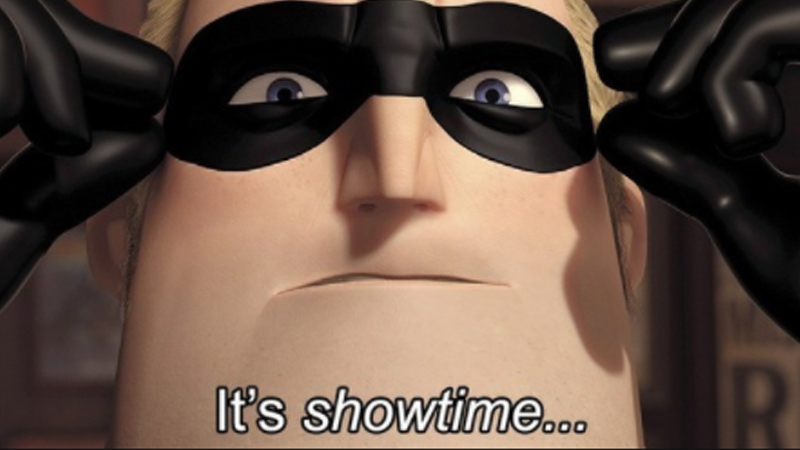

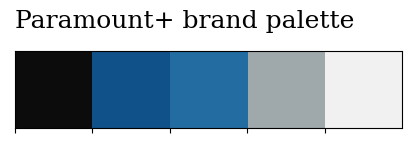

In [37]:
# Palette
sns.palplot(['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1'])

plt.title("Paramount+ brand palette ",loc='left',fontfamily='serif',fontsize=18,y=1.2)
plt.show()

In [38]:
count_data = showtime['type'].value_counts()

# Create a horizontal bar chart
fig = go.Figure(data=go.Bar(
    y=count_data.index,
    x=count_data.values,
    orientation='h',
    marker=dict(color=['#0c0c0c', '#11518a'])
))

# Set title and axis labels
fig.update_layout(
    title='Content on Paramount+ ',
    xaxis_title='Count',
    yaxis_title='Type of Content', title_x = 0.5
)
fig.show()

In [39]:
top_countries = pd.DataFrame(showtime['production_country'].value_counts()[:10])
top_countries = top_countries.reset_index()
top_countries = top_countries[top_countries['index'] != 'No Data']
top_countries

index  production_country
0    US                2583
1    GB                 186
2    CA                 118
4    AU                  24
5    DE                  23
6    IT                  20
7    FR                  20
8    ZA                  14
9    ES                  11

In [40]:
top_countries = top_countries.rename(columns = {
    'index' : 'production_country',
    'production_country' : 'content_produced'
})
top_countries

production_country  content_produced
0                 US              2583
1                 GB               186
2                 CA               118
4                 AU                24
5                 DE                23
6                 IT                20
7                 FR                20
8                 ZA                14
9                 ES                11

In [42]:
top_countries = top_countries[:5]
fig = px.pie(top_countries, values='content_produced', names='production_country',
             title='Contribution of Content Produced by Top 5 Countries on Paramount+')

# Change the color palette
fig.update_traces(marker=dict(colors=['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1']))

# Set the text position and information to be displayed
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [43]:
country_order = showtime['production_country'].value_counts()[:11].index
data = showtime[['type', 'production_country']].groupby('production_country')['type'].value_counts().unstack().loc[country_order]
data['sum'] = data.sum(axis=1)
data_ratio = (data.T / data['sum']).T[['MOVIE', 'SHOW']].sort_values(by='MOVIE',ascending=False)[::-1]
data_ratio = data_ratio.reset_index()

In [44]:
data_ratio = data_ratio[data_ratio['index'] != 'No Data']

In [45]:
data_ratio.rename(columns = {'index':'country_code'}, inplace = True)
data_ratio['MOVIE'] = round(data_ratio['MOVIE'], 2)
# data_ratio['MOVIE'] = (data_ratio['MOVIE'] * 100).astype(str) + '%'

In [46]:
data_ratio['SHOW'] = round(data_ratio['SHOW'],2)
data_ratio

type country_code  MOVIE  SHOW
0              IE   0.67  0.33
1              CA   0.69  0.31
2              US   0.79  0.21
3              GB   0.81  0.19
4              ES   0.82  0.18
5              AU   0.83  0.17
6              FR   0.85  0.15
7              ZA   0.86  0.14
8              DE   0.87  0.13
10             IT   0.95  0.05

In [107]:
fig = go.Figure()
# ['#221f1f', '#b20710', '#e50914','#f5f5f1','#ffffff']
# Add horizontal bar traces for MOVIE and SHOW
fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['MOVIE'],
    name='MOVIE',
    orientation='h',
    marker=dict(color='#11518a'),
    text=(data_ratio['MOVIE'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['SHOW'],
    name='SHOW',
    orientation='h',
    marker=dict(color='#9fa8ab'),
    text=(data_ratio['SHOW'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

# Set the layout
fig.update_layout(
    title='Content Distribution by Country on Paramount+',
    barmode='stack',
    yaxis_title='Top 10 Countries',
    xaxis=dict(showticklabels=False), title_x = 0.5 # Hide the x-axis tick labels
)

fig.show()

In [49]:
genre_distribution = pd.DataFrame(showtime.groupby('primary_genre')['type'].value_counts())
genre_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
genre_distribution['SUM'] = genre_distribution.sum(axis = 1)

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_65989/3203419532.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [50]:
genre_distribution.columns = ['primary_genre', 'MOVIE', 'SHOW', 'total']

In [51]:
genre_distribution = genre_distribution.sort_values('total', ascending = False)

In [108]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#11518a'),
))

fig1.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#9fa8ab'),
))

fig1.update_layout(
    title='Content Distribution by Genre on Paramount+',
    xaxis_title='Genre',
    yaxis_title='Content on Paramount+',
    barmode='stack'
)
fig1.show()

In [53]:
rating_distribution = pd.DataFrame(showtime.groupby('age_certification')['type'].value_counts())
# rating_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
rating_distribution = rating_distribution.unstack().reset_index().fillna(0)
rating_distribution['SUM'] = rating_distribution.sum(axis = 1)
rating_distribution.columns = ['age_certification','MOVIE','SHOW','Total']

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_65989/2154306660.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [54]:
rating_distribution = rating_distribution.sort_values('Total', ascending = False)

In [56]:
rating_distribution = rating_distribution[rating_distribution['age_certification']!='0']

In [109]:
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#11518a'),

))

fig2.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#9fa8ab'),

))

fig2.update_layout(
    title='Content Distribution by Age Rating Certification on Paramount+',
    xaxis_title='Genre',
    yaxis_title='Content on Paramount+',
    barmode='stack', legend_title = 'Type of Content', title_x = 0.5
)

fig2.show()

In [58]:
history = pd.DataFrame(showtime.groupby('release_year')['type'].value_counts())
history = history.unstack().reset_index().fillna(0)
# history['total'] = history.sum(axis = 1)
history.columns = ['release_year','MOVIE','SHOW']
history = history[(history['release_year'] >= 2000) & (history['release_year'] <= 2021)]

In [110]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['MOVIE'],
    mode='lines',
    name='MOVIE',
    fill='tozeroy',
    line=dict(color='#11518a')
))

fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['SHOW'],
    mode='lines',
    name='SHOW',
    fill='tozeroy',
    line=dict(color='#9fa8ab')
))

# Set the layout
fig3.update_layout(
    title="How old is Paramount+'s Content",
    xaxis_title='Release Year',
    yaxis_title='Content on Paramount+', showlegend = True, title_x =0.5
)
fig3.show()

In [62]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [63]:
demographic_data = showtime.copy()

In [64]:
demographic_data['target_ages'] = demographic_data['age_certification'].map(ratings_ages)

In [65]:
demographic_data = demographic_data.dropna()

In [66]:
# demographic_data.groupby('production_country','target_ages')[['production_country','target_ages']].sum()
demographic_data = demographic_data.groupby(['production_country', 'target_ages']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]
demographic_data

production_country target_ages  count
54                 US      Adults    373
57                 US       Teens    361
56                 US  Older Kids    256
55                 US        Kids    150
26                 GB      Adults     29
28                 GB  Older Kids     26
8                  CA      Adults     18
9                  CA        Kids     13
29                 GB       Teens     13
10                 CA  Older Kids     11
11                 CA       Teens     11
27                 GB        Kids      8
2                  AU      Adults      6
36                 IT      Adults      6
38                 IT       Teens      5
24                 FR      Adults      5
19                 DE       Teens      4
21                 ES      Adults      4
25                 FR  Older Kids      4
18                 DE  Older Kids      4

In [67]:
total_count = demographic_data['count'].sum()
demographic_data['percentage'] = (demographic_data['count'] / total_count) * 100

fig = px.treemap(demographic_data, path=['production_country', 'target_ages'], values='percentage',
                 color='target_ages', color_discrete_sequence= ['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1'])

fig.update_layout(title= "Disney+'s Country-Level Target Audience",
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()

In [68]:
demo_genre = showtime.groupby(['production_country', 'primary_genre']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]

In [69]:
demo_genre = demo_genre[demo_genre['production_country']!='No Data']

In [71]:
fig = px.treemap(demo_genre, path=['production_country', 'primary_genre'], values='count', 
                    color_discrete_sequence= ['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1'])

fig.update_layout(title='Disney+ Content by Genre and Country',
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()

In [111]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='type',
                 color_discrete_map={'MOVIE': '#11518a', 'SHOW': '#9fa8ab'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x =0.5)

fig.show()

In [112]:
fig = px.scatter(showtime, x='roberta_neg', y='roberta_pos', color='type',
                 color_discrete_map={'MOVIE': '#11518a', 'SHOW': '#9fa8ab'},
                 hover_data=['title'])

fig.update_layout(title='Roberta Negative Score vs Roberta Positive Score',
                  xaxis_title='Roberta Negative Score',
                  yaxis_title='Roberta Positive Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [74]:
showtime['sentiment'] = showtime.apply(lambda row: 'Negative' if row['roberta_neg'] > 0.5 else ('Neutral' if row['roberta_neu'] > 0.5 else 'Positive'), axis=1)


In [76]:
sentiment_counts = showtime['sentiment'].value_counts()

# Create the donut chart trace
fig4 = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    hole=0.5,  # Set the hole parameter to create a donut chart
    marker=dict(colors=['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1']),  # Set custom colors for the slices
    textinfo='label+percent',  # Display labels and percentages
    textposition='inside',  # Set the position of the labels inside the slice
)])

# Set the layout
fig4.update_layout(
    title='Sentiment Distribution of Content on Paramount+',
    showlegend=True, title_x = 0.5, 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Paramount+', x=0.50, y=0.5, font_size=15, showarrow=False)]
)
fig4.show()

In [113]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='sentiment',
                 color_discrete_map={'Negative': '#11518a', 'Neutral': '#226ca1', 'Positive': '#9fa8ab'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [78]:
genre_sentiment = showtime.groupby(['primary_genre', 'sentiment']).size().reset_index(name='count')
genre_sentiment = genre_sentiment[genre_sentiment['primary_genre']!= 'No Data']
genre_sentiment = genre_sentiment.sort_values('count', ascending = False)

In [114]:
colors = ['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1']
fig = px.sunburst(genre_sentiment, path=['primary_genre', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Genre vs Sentiments on Paramount+', title_x = 0.5)

fig.show()

In [80]:
age_certificate_sentiment = showtime.groupby(['age_certification', 'sentiment']).size().reset_index(name='count')
age_certificate_sentiment = age_certificate_sentiment[age_certificate_sentiment['age_certification']!= 'No Data']
age_certificate_sentiment = age_certificate_sentiment.sort_values('count', ascending = False)

In [81]:
age_certificate_sentiment = age_certificate_sentiment[age_certificate_sentiment['age_certification']!='0']

In [115]:
fig = px.sunburst(age_certificate_sentiment, path=['age_certification', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Rating vs Sentiments on Paramount+', title_x = 0.5)

fig.show()

In [83]:
filter_showtime = showtime[(showtime['release_year'] >= 2010) & (showtime['release_year'] <= 2020)]

filter_showtime = filter_showtime.groupby(['release_year', 'sentiment']).size().reset_index(name='count')

colors = ['#0c0c0c','#11518a', '#226ca1','#9fa8ab','#f1f1f1']

fig = px.area(filter_showtime, x='release_year', y='count', color='sentiment',
              color_discrete_sequence=colors,
              title='Trend of Content Release Over Time')


fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Content Produced',
    legend_title='Sentiment', title_x = 0.5
)
fig.show()

In [84]:
showtime['title'] = showtime['title'].astype(str)
title_corpus = ' '.join(showtime['title'])

In [85]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image

In [86]:
stopwords = set(STOPWORDS)

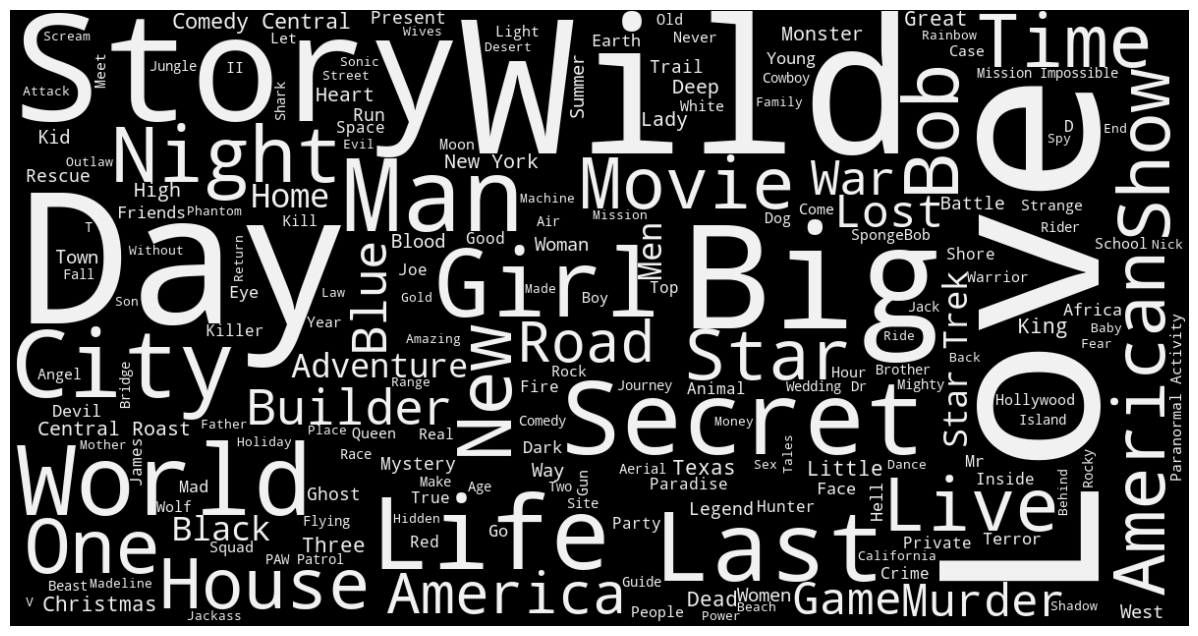

In [88]:
# Define a function to specify the text color
def paramount_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#f1f1f1"

custom_mask = np.array(Image.open('paramount-plus.png')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = paramount_color)
#background_color = 'white',
wc.generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [89]:
numeric_columns = showtime.select_dtypes(include=[int, float])
numeric_columns

roberta_neg  roberta_neu  roberta_pos  release_year  runtime  \
0        0.631655     0.353862     0.014483          1950      110   
1        0.267469     0.690081     0.042451          1940       92   
2        0.052365     0.714091     0.233544          1948      133   
3        0.307299     0.581026     0.111675          1926       79   
4        0.514058     0.425580     0.060361          1921       68   
...           ...          ...          ...           ...      ...   
3177     0.348201     0.558680     0.093120          2023       48   
3178     0.110903     0.598619     0.290478          2023       24   
3179     0.005250     0.211171     0.783579          2023       42   
3180     0.559180     0.400319     0.040501          2023       44   
3181     0.309792     0.642543     0.047666          2023       42   

      imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0            8.4    224704.0           18.431       8.366  
1            7.8     60244.0           14.759       7.433  
2            7.8     32210.0           12.400       7.400  
3            8.1     92935.0           12.316       8.009  
4            8.3    128096.0           14.865       8.212  
...          ...         ...              ...         ...  
3177         7.7        91.0            4.342       2.000  
3178         6.9        25.0            7.531         NaN  
3179         5.7        76.0            2.751       2.000  
3180         NaN         NaN            1.623         NaN  
3181         NaN         NaN            0.652         NaN  

[3182 rows x 9 columns]

In [95]:
colors = ['#11518a', '#226ca1','#9fa8ab','#f1f1f1']

fig = px.histogram(showtime, x='runtime', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='Runtime Distribution of Content on Paramount+',
    xaxis_title='Runtime',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [94]:
colors = ['#226ca1', '#9fa8ab', '#f1f1f1']

fig = px.histogram(showtime, x='imdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='IMDB Score Distribution of Content on Paramount+',
    xaxis_title='IMDB Score',
    yaxis_title='Count of Content',
    title_x=0.5,
    bargap=0.2  # Add a gap between the bars
)

fig.show()

In [101]:

colors = ['#226ca1', '#9fa8ab', '#f1f1f1']

fig = px.histogram(showtime, x='tmdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='TMDB Score Distribution of Content on Paramount+',
    xaxis_title='TMDB Score',
    yaxis_title='Count of Content',
    title_x=0.5,
    bargap=0.2  # Add a gap between the bars
)

fig.show()

In [102]:
para_credits = pd.read_csv('paramount_credits.csv')

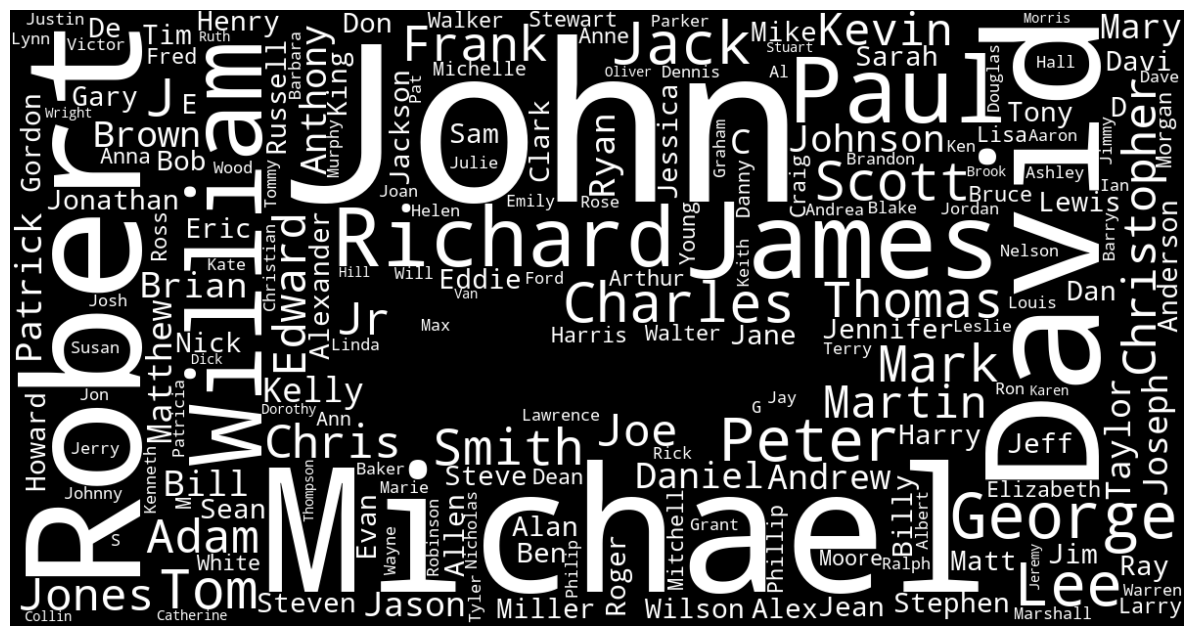

In [103]:
# most popular actor on amazon prime
para_credits['name'] = para_credits['name'].astype(str)
name_corpus = ' '.join(para_credits['name'])

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image
stopwords = set(STOPWORDS)

# Define a function to specify the text color
def disney_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#ffffff"

custom_mask = np.array(Image.open('disney.png')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = disney_color)
#background_color = 'white',
wc.generate(name_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()